# Taxi trips as a connection to the airports

In [1]:
import setup

def airports_to_manhatten(month):
    return month.loc[(month.PULocationID.isin(setup.airports)) & (month.DOLocationID.isin(setup.manhatten)) &
                     (month['passenger_count'] > 0)]['DOLocationID'].value_counts()

def manhatten_to_airports(month):
    return month.loc[(month.PULocationID.isin(setup.manhatten)) & (month.DOLocationID.isin(setup.airports)) & 
                     (month['passenger_count'] > 0)]['DOLocationID'].value_counts()

def devide_by_airport(month):   
    jfk = 0
    lga = 0
    for key in month.keys():
        if key == 132:
            jfk = month[key]
        elif key == 138:
            lga = month[key]
    return [jfk,lga]

def sum_airports(sum_trips, month):
    for airport in range(2):
        sum_trips[airport] += month[airport]
    return sum_trips

def percentage_manhatten(month):
    return month / month.sum() * 100

def percentage_airports(amounts):
    return [amounts[0]/sum(amounts)*100, amounts[1]/sum(amounts)*100]

def center(center):
    airports_center = []
    for category in range(9):
        tmp = center.loc[(center >= category)&(center < category+1)]
        tmp_list = []
        for key in tmp.keys():
            tmp_list.append(key)
        airports_center.append(tmp_list)
    return airports_center

# From airports
#### Amount of trips from airports to manhatten

In [2]:
airport_trips = []
for month in setup.year:
    airport_trips.append(airports_to_manhatten(month))
manhatten_center = center(percentage_manhatten(sum(airport_trips)))
for index in range(9):
    print('---------- Category', index, '----------')
    print(manhatten_center[index], '\n')

---------- Category 0 ----------
[4, 12, 24, 41, 42, 43, 45, 50, 74, 75, 88, 114, 116, 120, 125, 127, 128, 137, 144, 151, 152, 153, 158, 166, 194, 202, 209, 211, 224, 232, 243, 244, 246] 

---------- Category 1 ----------
[13, 79, 87, 90, 113, 140, 143, 148, 231, 234, 237, 238, 249, 261, 262, 263] 

---------- Category 2 ----------
[68, 100, 107, 141, 142, 186, 229, 233, 236, 239] 

---------- Category 3 ----------
[163] 

---------- Category 4 ----------
[48, 164, 170] 

---------- Category 5 ----------
[161, 162] 

---------- Category 6 ----------
[] 

---------- Category 7 ----------
[] 

---------- Category 8 ----------
[230] 



![](../assets/airport_manhatten.jpg?raw=true)

# To airports
#### Amount of trips from manhatten to airports

-------------------- YEAR AVERAGE --------------------
[39.69209023471572, 60.307909765284286] 


-------------------- JANUARY --------------------
[39.7576618113942, 60.24233818860579] 

-------------------- FEBRUARY --------------------
[37.84953002713651, 62.15046997286349] 

-------------------- MARCH --------------------
[39.86424900610879, 60.1357509938912] 

-------------------- APRIL --------------------
[39.33628035107951, 60.6637196489205] 

-------------------- MAY --------------------
[40.47105732897512, 59.52894267102488] 

-------------------- JUNE --------------------
[39.18042287487615, 60.81957712512385] 

-------------------- JULY --------------------
[40.3283511196574, 59.6716488803426] 

-------------------- AUGUST --------------------
[40.6037956291847, 59.3962043708153] 

-------------------- SEPTEMBER --------------------
[41.61723567233475, 58.38276432766525] 

-------------------- OKTOBER --------------------
[39.05970568698584, 60.94029431301416] 

-----------

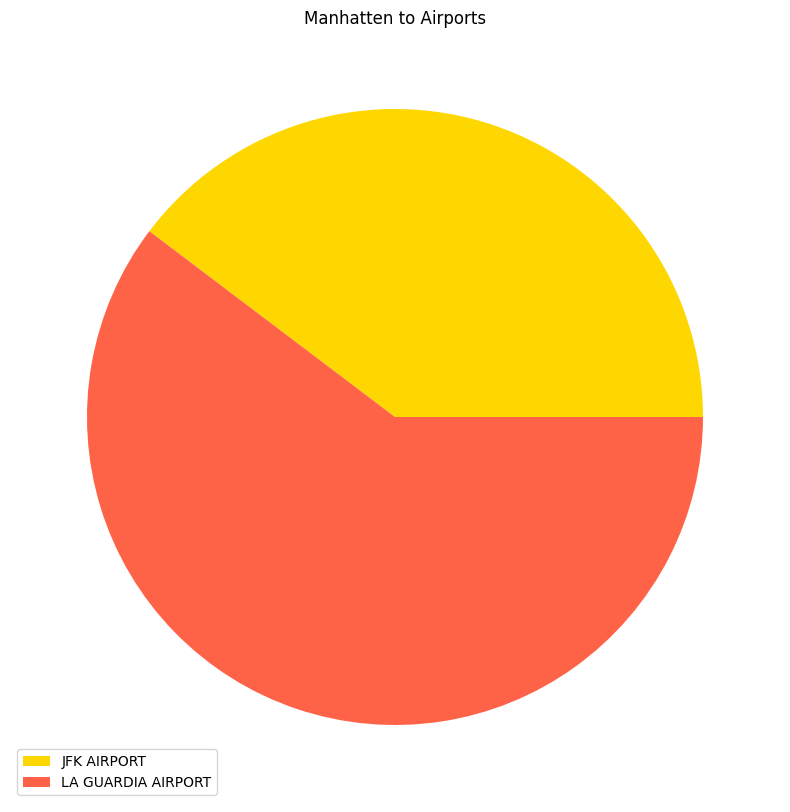

In [3]:
   
airport_trips = []
for month in setup.year:
    airport_trips.append(manhatten_to_airports(month))
devided_airport_trips = []
for month in airport_trips:
    devided_airport_trips.append(devide_by_airport(month))
airport_trips_amount = [0,0]
for month in devided_airport_trips:
    amount_airport_trips = sum_airports(airport_trips_amount, month)
print('-------------------- YEAR AVERAGE --------------------')
print(percentage_airports(amount_airport_trips), '\n\n')
for index in range(12):
    print('--------------------', setup.month_labels[index], '--------------------')
    print(percentage_airports(devided_airport_trips[index]), '\n')
fig = setup.plt.figure(figsize =(10, 10))
setup.plt.title('Manhatten to Airports')
setup.plt.pie(percentage_airports(airport_trips_amount), colors=setup.airport_colors)
setup.plt.legend(setup.airport_labels,loc=3)
setup.plt.show()